In [2]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests as req
import pandas as pd

In [3]:
# Create a reference the CSV file desired
csv_path1 = "clinicaltrial_data.csv"
csv_path2 = "mouse_drug_data.csv"

# Read the CSV into a Pandas DataFrame
trial_df = pd.read_csv(csv_path1)
drug_df = pd.read_csv(csv_path2)

# Print the first five rows of data to the screen
trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
# Combine the data into a single dataset
data_complete = pd.merge(trial_df, drug_df, how="outer", on=["Mouse ID", "Mouse ID"])
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [6]:
#Sort table by Double Index

tumor_vol_mean = pd.DataFrame(data_complete.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())
#tumor_vol_mean = pd.DataFrame(drug_data.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
tumor_vol_mean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [7]:
#This is the calculated Error
tumor_vols_sem = data_complete.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
tumor_vols_sem = pd.DataFrame(tumor_vols_sem)
tumor_vols_sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [8]:
tumor_vols_sem = tumor_vols_sem.reset_index()
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_vols_pivot_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [9]:
tumor_vol_mean = tumor_vol_mean.reset_index()
tumor_vol_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [10]:
tumor_vols_pivot_mean = tumor_vol_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_vols_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


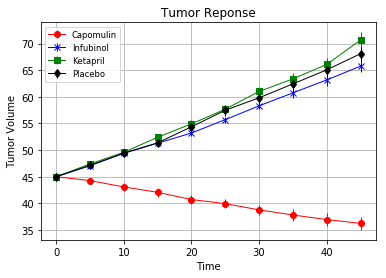

In [11]:

#plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Capomulin"], tumor_vols_pivot_sem)
            
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Capomulin"], yerr=tumor_vols_pivot_sem["Capomulin"], color="r", linewidth=1, marker="o")
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Infubinol"], yerr=tumor_vols_pivot_sem["Infubinol"], color="b", linewidth=1, marker="x")
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Ketapril"], yerr=tumor_vols_pivot_sem["Ketapril"], color="g", linewidth=1, marker="s")
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Placebo"], yerr=tumor_vols_pivot_sem["Placebo"], color="k", linewidth=1, marker="d")


plt.title("Tumor Reponse")
plt.ylabel("Tumor Volume")
plt.xlabel("Time")
plt.grid(True)
plt.legend(loc="best", fontsize="small",fancybox=True)

plt.savefig("Fig1.jpg")
plt.show()

In [ ]:
for i in new['Drugs']
change_tumor_vol = i['Timepoint'=45] - i['Timepoint'=0]
change_tumor_vol


In [ ]:
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Capomulin"])

plt.scatter(temp, sales, marker="o", facecolors="red", edgecolors="black")             
             

drug1 = drug_response[(drug_response["Drug"] == "Capomulin")]
drug1 = drug_response["Timepoint"].value_counts()
drug2 = drug_response["Timepoint"== 0].count()
drug2 

[(school_data_complete["grade"] == "9th")]

In [ ]:
drug_response1 = []

for drug in drug_response

    for timepoint in drug_response
        volume_per_timepoint = volume_per_timepoint + drug_response["tumor Volume (mm3)"]
        drug_response1["Volume per timepoint"]= volume_per_timepoint
        
        
        
        